In [22]:
# Let`s import all packages that we may need:

import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
#from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For time stamps
from datetime import datetime

In [23]:
import pandas as pd
import glob

path = r'C:/Users/Hitesh/Desktop/LJMU/Forex Implementation/USD BCO/Data/' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df.columns = ['Index','Timestamp','Open_Bid_Quote','High_Bid_Quote','Low_Bid_Quote','Close_Bid_Quote','Volume']
    df.drop(columns=['Index','Volume','Open_Bid_Quote','High_Bid_Quote','Low_Bid_Quote'],inplace=True)
    li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)

<Figure size 1440x360 with 0 Axes>

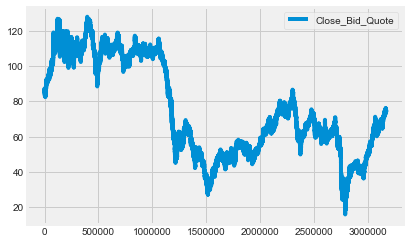

In [24]:
plt.figure(figsize=(20,5))
data.plot()

In [25]:
data.head

<bound method NDFrame.head of                    Timestamp  Close_Bid_Quote
0        2010-11-14 20:17:00           86.750
1        2010-11-14 20:18:00           86.760
2        2010-11-14 20:19:00           86.740
3        2010-11-14 20:21:00           86.740
4        2010-11-14 20:24:00           86.750
...                      ...              ...
3167034  2021-06-30 23:54:00           74.778
3167035  2021-06-30 23:55:00           74.778
3167036  2021-06-30 23:56:00           74.783
3167037  2021-06-30 23:57:00           74.783
3167038  2021-06-30 23:58:00           74.793

[3167039 rows x 2 columns]>

In [26]:
data['Timestamp'].min()

'2010-11-14 20:17:00'

In [27]:
data['Timestamp'].max()

'2021-06-30 23:58:00'

In [28]:
from datetime import datetime                                              
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data = data.set_index('Timestamp')

In [29]:
data = data.resample("H").max()

In [30]:
data.columns

Index(['Close_Bid_Quote'], dtype='object')

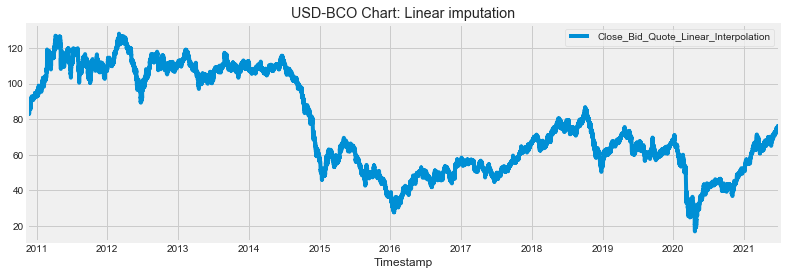

In [31]:
data = data.assign(Close_Bid_Quote_Linear_Interpolation=data.Close_Bid_Quote.interpolate(method='linear'))
data[['Close_Bid_Quote_Linear_Interpolation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('USD-BCO Chart: Linear imputation')
plt.show(block=False)

In [32]:
data.drop(columns=['Close_Bid_Quote'],inplace=True)

In [33]:
data=data.rename(columns={"Close_Bid_Quote_Linear_Interpolation": "Close_Bid_Quote"}, errors="raise")

In [34]:
data.head()

,Close_Bid_Quote
Timestamp,
2010-11-14 20:00:00,86.89
2010-11-14 21:00:00,86.90
2010-11-14 22:00:00,86.87
2010-11-14 23:00:00,86.63
2010-11-15 00:00:00,86.63


In [35]:
train_len = int(len(data['Close_Bid_Quote'])*80/100)
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24

In [36]:
len(test)

18630

In [37]:
len(train)

74518

In [38]:
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .80 ))
training_data_len

74519

In [39]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.62989612],
       [0.62998606],
       [0.62971624],
       ...,
       [0.52132032],
       [0.52298422],
       [0.52266942]])

In [40]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets

In [41]:
# Create the training data set 
# Create the scaled training data set

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.62989612, 0.62998606, 0.62971624, 0.62755767, 0.62755767,
       0.62773755, 0.6291766 , 0.63223456, 0.63277421, 0.63358367,
       0.63340379, 0.63502271, 0.63385349, 0.63421325, 0.63286415,
       0.63205468, 0.6323245 , 0.63160498, 0.63151504, 0.6282772 ,
       0.6282772 , 0.62710797, 0.62731783, 0.62752769, 0.62773755,
       0.62737779, 0.62728785, 0.62701803, 0.62719791, 0.62548905,
       0.62566893, 0.62692809, 0.62548905, 0.62485947, 0.6213518 ,
       0.6213518 , 0.62171156, 0.61964294, 0.61874354, 0.61721455,
       0.61334712, 0.61541575, 0.61532581, 0.61010928, 0.61136844,
       0.61091874, 0.61091874, 0.61091874, 0.61055898, 0.61046904,
       0.61046904, 0.61055898, 0.61064892, 0.6103791 , 0.60894005,
       0.60507263, 0.60804065, 0.60974952, 0.60956964, 0.60929982])]
[0.6112784997976345]

[array([0.62989612, 0.62998606, 0.62971624, 0.62755767, 0.62755767,
       0.62773755, 0.6291766 , 0.63223456, 0.63277421, 0.63358367,
       0.63340379, 0.63502271, 0.633

In [42]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
2327/2327 [==============================] - 121s 51ms/step - loss: 0.0031
Epoch 2/10
2327/2327 [==============================] - 122s 52ms/step - loss: 2.9475e-05
Epoch 3/10
2327/2327 [==============================] - 152s 66ms/step - loss: 3.3287e-05
Epoch 4/10
2327/2327 [==============================] - 119s 51ms/step - loss: 2.2209e-05
Epoch 5/10
2327/2327 [==============================] - 148s 64ms/step - loss: 1.7340e-05
Epoch 6/10
2327/2327 [==============================] - 126s 54ms/step - loss: 9.6518e-06
Epoch 7/10
2327/2327 [==============================] - 115s 49ms/step - loss: 1.1106e-05
Epoch 8/10
2327/2327 [==============================] - 116s 50ms/step - loss: 9.4860e-06
Epoch 9/10
2327/2327 [==============================] - ETA: 0s - loss: 7.8234e-0 - 115s 50ms/step - loss: 7.8236e-06
Epoch 10/10
2327/2327 [==============================] - 118s 51ms/step - loss: 7.3438e-06


In [43]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

0.2020206306083196

C:\Users\Hitesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


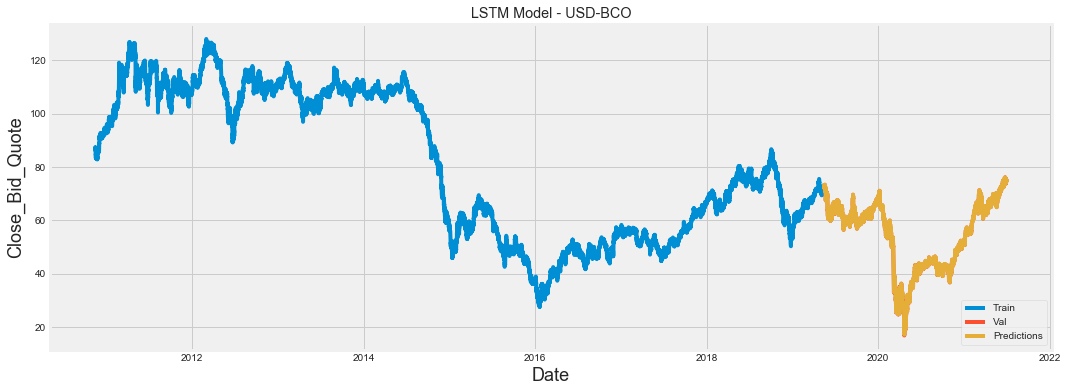

In [47]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM Model - USD-BCO')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close_Bid_Quote', fontsize=18)
plt.plot(train['Close_Bid_Quote'])
plt.plot(valid[['Close_Bid_Quote', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [45]:
# Show the valid and predicted prices
valid

,Close_Bid_Quote,Predictions
Timestamp,,
2019-05-16 19:00:00,72.83275,72.797478
2019-05-16 20:00:00,72.85100,72.816635
2019-05-16 21:00:00,72.97100,72.836739
2019-05-16 22:00:00,73.03100,72.967781
2019-05-16 23:00:00,73.01600,73.023750
...,...,...
2021-06-30 19:00:00,74.69400,74.675629
2021-06-30 20:00:00,74.70700,74.689919
2021-06-30 21:00:00,74.81800,74.704468
